 1 component: AIC =  273.43636684 BIC =  274.151340716
2 componets: AIC =  215.064769713 BIC =  216.574159005


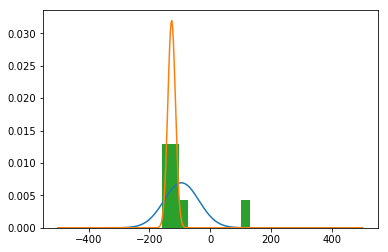

In [95]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas
from PlotFuncs import *
from sklearn import mixture

vmin=-495.0
vmax=495.0
nbins=30
cmap=cm.Greens
col1='ForestGreen'
levels=[0.2]
tit_fontsize=30
z_th = 6.0
colp = 'Orange'

df = pandas.read_csv('../GAIA_SDSS_substructures_next_30_cands.csv')
names = df.group_id.unique()
num_cands = size(names)

i_cand = 25
Cand = df.loc[df['group_id'] == names[i_cand]]


######
name = Cand.group_id.unique()[0]
nstars = size(Cand,0)
feh = Cand.feh
vx,vy,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel
data = array([vy,vx,vz]).T
clf1 = mixture.GaussianMixture(n_components=1, covariance_type='full')
clf2 = mixture.GaussianMixture(n_components=2, covariance_type='full')

 
clf1.fit(data)
print ' 1 component: AIC = ',clf1.aic(data),'BIC = ',clf1.bic(data)

clf2.fit(data)
print '2 componets: AIC = ',clf2.aic(data),'BIC = ',clf2.bic(data)


vfine = linspace(-500,500,400)

clf1.fit(vx.values.reshape(-1,1))
fv1 = 10.**clf1.score_samples(vfine.reshape(-1,1))
fv1 /= trapz(fv1,vfine)
plt.plot(vfine,fv1)

clf2.fit(vx.values.reshape(-1,1))
fv2 = 10.**clf2.score_samples(vfine.reshape(-1,1))
fv2 /= trapz(fv2,vfine)
plt.plot(vfine,fv2)

plt.hist(vx,normed=True)

plt.show()

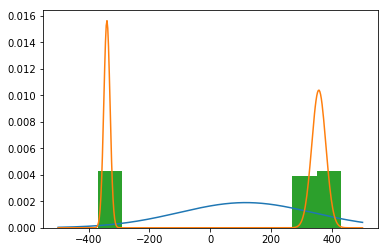

In [78]:
vfine = linspace(-500,500,400)

clf1.fit(vx.values.reshape(-1,1))
fv1 = 10.**clf1.score_samples(vfine.reshape(-1,1))
fv1 /= trapz(fv1,vfine)
plt.plot(vfine,fv1)

clf2.fit(vx.values.reshape(-1,1))
fv2 = 10.**clf2.score_samples(vfine.reshape(-1,1))
fv2 /= trapz(fv2,vfine)
plt.plot(vfine,fv2)

plt.hist(vx,normed=True)

plt.show()

In [72]:
clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
clf.fit(vy.values.reshape(-1,1))
print clf.bic(vy.values.reshape(-1,1))

clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(vy.values.reshape(-1,1))
print clf.bic(vy.values.reshape(-1,1))

246.624379517
255.118101222


In [12]:
shape(X_train)

(600, 2)